# 1: COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Clasificación de Enfermedades utilizando Deep Learning
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1t-Q7JllEobw8YwV3wcTuMA12J9JArfwp)

![alt text](https://drive.google.com/uc?id=1pNAshUhBxksQcrTfulYmUKXUPOmWbXb0)

##  Hospital requiere automatizar el proceso de detección y clasificación de las enfermedades de pecho para reducir el coste y tiempo de detección. 
## La Base de datos esta compuesta por imagenes de Rayos X y nos entregan 133 imágenes que pertenecen a 4 categorías:
##  Normal
* Covid-19
* Pneumonía Bacterial
* Pneumonía Vírica

# 2: IMPORTAR LIBRERÍAS Y CONJUNTO DE DATOS

In [1]:
# By: Bastián Astudillo Fica
import os  # Para manipulación de rutas y archivos del sistema operativo
import cv2  # Para manipulación de imágenes y visión por computadora
import tensorflow as tf  # Biblioteca de aprendizaje automático de código abierto
import numpy as np  # Biblioteca para manipulación de matrices y cálculos numéricos
from tensorflow.keras import layers, optimizers  # Componentes para construir modelos de aprendizaje profundo
from tensorflow.keras.applications.resnet50 import ResNet50  # Modelo preentrenado de ResNet-50
from tensorflow.keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization,
                                     Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout)  # Capas para construir la arquitectura del modelo
from tensorflow.keras.models import Model, load_model  # Modelos de Keras para construir y cargar modelos
from tensorflow.keras import backend as K  # Funciones y operaciones backend de Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generación de imágenes aumentadas en tiempo real
from tensorflow.keras.callbacks import (ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler)  # Devolución de llamada para controlar el entrenamiento del modelo
import matplotlib.pyplot as plt  # Biblioteca para trazar gráficos y visualizar datos
import seaborn as sns  # Biblioteca para la visualización de datos estadísticos
import pandas as pd  # Biblioteca para manipulación y análisis de datos tabulares


In [3]:
# By: Bastián Astudillo Fica
Especificar el directorio del conjunto de entrenamiento:
XRay_Directory = "Dataset"

# Listar las carpetas en el directorio:
os.listdir(XRay_Directory)

# Utilizar el generador de imágenes para generar datos de imágenes en formato tensor y normalizarlos:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
# By: Bastián Astudillo Fica
# Genere lotes de 40 imágenes
# El número total de imágenes es 133 * 4 = 532 imágenes
# El entrenamiento usará es 428 (80%) y la validación usará 104 (20%)
# Realizar muestreo aleatoria y cambio del tamaño en las imágenes
train_generator = image_generator.flow_from_directory(batch_size = 40, directory = XRay_Directory, shuffle = True,
                                                      target_size = (256, 256), class_mode = "categorical", subset = "training")

Found 428 images belonging to 4 classes.


In [7]:
# By: Bastián Astudillo Fica
# generador de lotes por 40 imagenes para validación
train_generator = image_generator.flow_from_directory(batch_size=40, directory=XRay_Directory,
                                                      shuffle=True, target_size=(256, 256), 
                                                      class_mode="categorical", subset="validation")

Found 104 images belonging to 4 classes.


In [8]:
# By: Bastián Astudillo Fica
train_images, train_labels = next(train_generator) # Generate a batch of 40 images and labels

In [9]:
# By: Bastián Astudillo Fica
train_images.shape

(40, 256, 256, 3)

In [10]:
# By: Bastián Astudillo Fica
train_labels.shape

(40, 4)

In [11]:
# By: Bastián Astudillo Fica
train_labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]],

In [12]:
# By: Bastián Astudillo Fica
label_names = {0: 'COVID-19', 1: 'Normal', 2: 'Pneumonia Virica', 3: 'Pneumonia Bacteriana'}# Translation of each label

# 3: VISUALIZACIÓN DEL DATASET

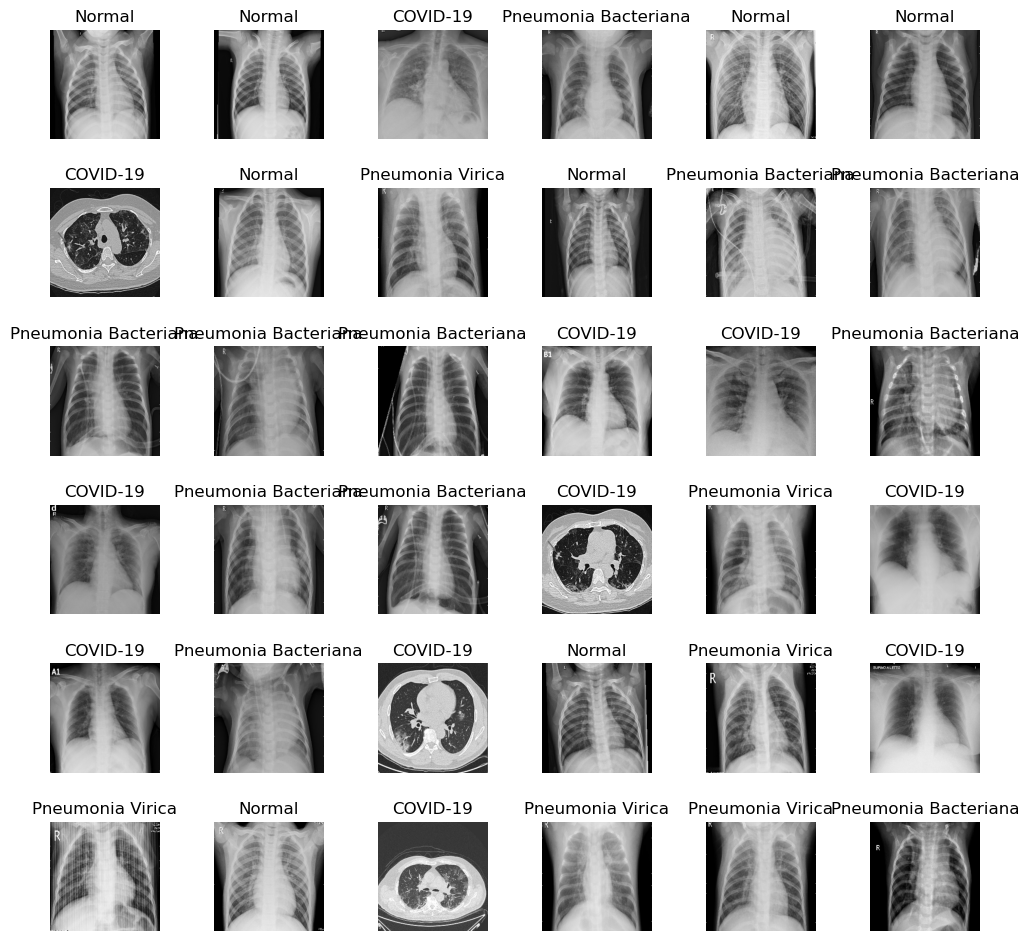

In [38]:
# By: Bastián Astudillo Fica
# Crea una matriz de 36 imágenes junto con sus etiquetas correspondientes
L = 6  # Número de filas en la visualización de imágenes
W = 6  # Número de columnas en la visualización de imágenes

fig, axes = plt.subplots(L, W, figsize = (12,12))  # Crear subplots para mostrar imágenes
axes = axes.ravel()  # Aplanar los subplots en una sola lista
# Mostrar las primeras L*W imágenes de entrenamiento con su etiqueta correspondiente
for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)  # Ajustar el espacio entre los subplots

# 4: IMPORTAR EL MODELO CON PESOS PRE ENTRENADOS

In [14]:
# By: Bastián Astudillo Fica
basemodel = ResNet50(weights = "imagenet", include_top = False, input_tensor = Input(shape = (256, 256, 3)))

In [15]:
# By: Bastián Astudillo Fica
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [16]:
# By: Bastián Astudillo Fica
# Congelar el modelo hasta las últimas etapas - 4 y llevar a cabo un re entrenamiento -5
for layer in basemodel.layers[:-10]:
    layer.trainable = False

 # 5: CONSTRUIR Y ENTRENAR UN MODELO DE DEEP LEARNING

In [17]:
# By: Bastián Astudillo Fica
# Construir la cabeza de la red neuronal sobre el modelo base
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4, 4))(headmodel)
headmodel = Flatten(name='flatten')(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation='relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation='softmax')(headmodel)

# Construir el modelo final combinando el modelo base y la cabeza de la red
model = Model(inputs=basemodel.input, outputs=headmodel)

In [20]:
# By: Bastián Astudillo Fica
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])


model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4, decay = 1e-6), metrics = ["accuracy"])

In [21]:
# By: Bastián Astudillo Fica
# Usar la parada temprana (early stopping) para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# Almacenar el mejor modelo con la menor pérdida en la validación
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only=True)

In [22]:
# By: Bastián Astudillo Fica
train_generator = image_generator.flow_from_directory(batch_size=4, directory = XRay_Directory, shuffle = True, target_size=(256, 256), class_mode = "categorical", subset = "training")
val_generator = image_generator.flow_from_directory(batch_size=4, directory = XRay_Directory, shuffle = True, target_size=(256, 256), class_mode = "categorical", subset = "validation")

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [24]:
# By: Bastián Astudillo Fica
history = model.fit(train_generator, steps_per_epoch=train_generator.n//4, epochs=25,
                    validation_data=val_generator, validation_steps=val_generator.n//4,
                    callbacks=[checkpointer, earlystopping])


Epoch 1/25
107/107 [==============================] - ETA: 0s - loss: 1.0000 - accuracy: 0.5888
Epoch 1: val_loss improved from 1.26145 to 1.16826, saving model to weights.hdf5
107/107 [==============================] - 47s 443ms/step - loss: 1.0000 - accuracy: 0.5888 - val_loss: 1.1683 - val_accuracy: 0.4712
Epoch 2/25
107/107 [==============================] - ETA: 0s - loss: 0.9126 - accuracy: 0.6168
Epoch 2: val_loss improved from 1.16826 to 0.87764, saving model to weights.hdf5
107/107 [==============================] - 47s 440ms/step - loss: 0.9126 - accuracy: 0.6168 - val_loss: 0.8776 - val_accuracy: 0.6154
Epoch 3/25
107/107 [==============================] - ETA: 0s - loss: 0.8358 - accuracy: 0.6636
Epoch 3: val_loss improved from 0.87764 to 0.79193, saving model to weights.hdf5
107/107 [==============================] - 48s 453ms/step - loss: 0.8358 - accuracy: 0.6636 - val_loss: 0.7919 - val_accuracy: 0.6827
Epoch 4/25
107/107 [==============================] - ETA: 0s - los

 # 6: EVALUAR EL MODELO DE DEEP LEARNING ENTRENADO

In [39]:
# By: Bastián Astudillo Fica
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

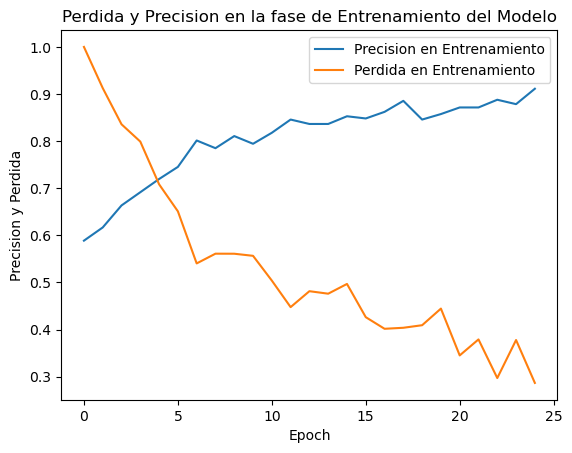

In [40]:
# By: Bastián Astudillo Fica
# Graficar la precisión durante el entrenamiento del modelo
plt.plot(history.history['accuracy'])

# Graficar la pérdida durante el entrenamiento del modelo
plt.plot(history.history['loss'])

# Título del gráfico
plt.title("Precisión y Pérdida durante el entrenamiento del modelo")

# Etiqueta del eje x
plt.xlabel("Época")

# Etiqueta del eje y
plt.ylabel("Precisión y Pérdida")

# Leyendas de las líneas
plt.legend(["Precisión en entrenamiento", "Pérdida en entrenamiento"])

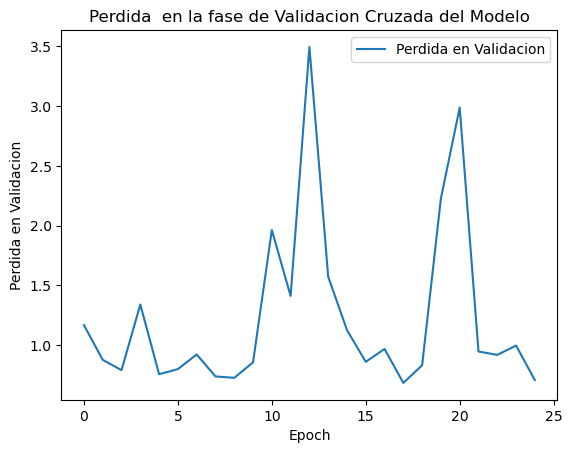

In [41]:
# By: Bastián Astudillo Fica
# Graficar la pérdida durante la validación cruzada del modelo
plt.plot(history.history['val_loss'])

# Título del gráfico
plt.title("Pérdida en la fase de Validación Cruzada del Modelo")

# Etiqueta del eje x
plt.xlabel("Época")

# Etiqueta del eje y
plt.ylabel("Pérdida en Validación")

# Leyenda de la línea
plt.legend(["Pérdida en Validación"])

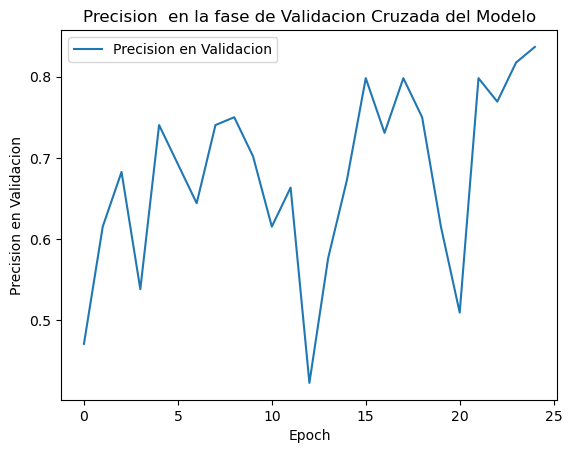

In [42]:
# By: Bastián Astudillo Fica
# Graficar la precisión durante la validación cruzada del modelo
plt.plot(history.history['val_accuracy'])

# Título del gráfico
plt.title("Precisión en la fase de Validación Cruzada del Modelo")

# Etiqueta del eje x
plt.xlabel("Época")

# Etiqueta del eje y
plt.ylabel("Precisión en Validación")

# Leyenda de la línea
plt.legend(["Precisión en Validación"])

In [43]:
# By: Bastián Astudillo Fica
test_directory = "Test"

In [66]:
# By: Bastián Astudillo Fica
# Generar un generador de imágenes de prueba y realizar la evaluación del modelo
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(batch_size=10, directory=test_directory, shuffle=True, target_size=(256, 256), class_mode="categorical")
evaluate = model.evaluate(test_generator, steps=test_generator.n // 10, verbose=1)
print("Precision en la fase de Test: {}".format(evaluate[1]))


Found 40 images belonging to 4 classes.
4/4 [==============================] - 2s 556ms/step - loss: 1.3819 - accuracy: 0.7000
Precision en la fase de Test: 0.699999988079071


In [67]:
# By: Bastián Astudillo Fica
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Listas para almacenar las predicciones, etiquetas originales e imágenes
prediction = []
original = []
image = []

# Iterar sobre las carpetas del directorio de prueba
for i in range(len(os.listdir(test_directory))):
    # Iterar sobre los archivos de cada carpeta
    for item in os.listdir(os.path.join(test_directory, str(i))):
        # Leer la imagen y redimensionarla
        img = cv2.imread(os.path.join(test_directory, str(i), item))
        img = cv2.resize(img, (256,256))
        
        # Agregar la imagen a la lista de imágenes
        image.append(img)
        
        # Normalizar la imagen
        img = img/255
        
        # Darle forma a la imagen para que coincida con el formato de entrada del modelo
        img = img.reshape(-1, 256, 256, 3)

1/1 [==============================] - 0s 107ms/step


In [68]:
# By: Bastián Astudillo Fica
len(original)

40

# 7: RESULTADOS Y CONCLUSIONES DEL MODELO DEEP LEARNING

In [69]:
# By: Bastián Astudillo Fica
score = accuracy_score(original, prediction)
print("Eficacia de la prediccion {}".format(score))

Eficacia de la prediccion 0.7


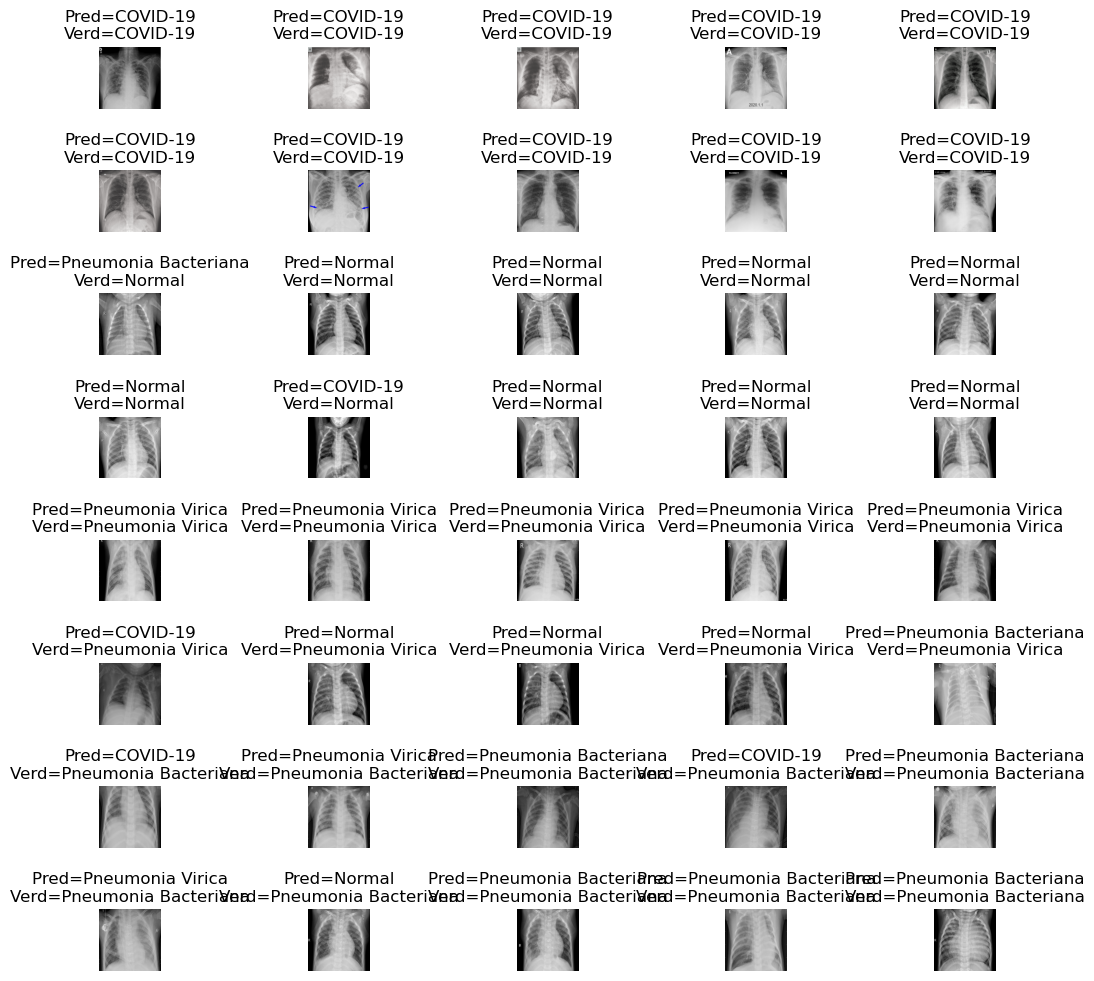

In [70]:
# By: Bastián Astudillo Fica
L = 8
W = 5

# Crear una figura con subplots para mostrar las imágenes
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

# Iterar sobre las primeras L*W imágenes
for i in np.arange(0, L*W):
    # Mostrar la imagen
    axes[i].imshow(image[i])
    
    # Obtener las etiquetas predicha y original correspondientes a la imagen
    pred_label = label_names[prediction[i]]
    orig_label = label_names[original[i]]
    
    # Establecer el título del subplot con las etiquetas predicha y original
    axes[i].set_title("Predicción = {}\nOriginal = {}".format(str(pred_label), str(orig_label)))
    
    # Ocultar los ejes
    axes[i].axis('off')

# Ajustar los espacios entre los subplots
plt.subplots_adjust(wspace=1.2, hspace=1)

In [71]:
# By: Bastián Astudillo Fica
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.67      0.80      0.73        10
           2       0.71      0.50      0.59        10
           3       0.71      0.50      0.59        10

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.68        40
weighted avg       0.70      0.70      0.68        40



### En base a los resultados obtenidos, podemos concluir que: 
 Clases 0: 'COVID-19', 1: 'Normal', 2: 'Pneumonia Virica', 3: 'Pneumonia Bacteriana'
1. Precisión: El modelo tiene una precisión promedio de alrededor de 0,70 en la clasificación. Esto significa que, en promedio, el 70% de las predicciones del modelo son correctas. 
2. Recall: El modelo muestra diferentes niveles de Recall para cada clase. Las clases 0 y 1 tienen un Recall relativamente alto, y las clases 2 y 3 tienen un Recall bajo. Esto muestra que el modelo es bueno para reconocer las clases 0 y 1, pero tiene dificultad para clasificar  las clases 2 y 3 correctamente. 
3. F1-score: la puntuación F1 es una combinación de precisión y memoria, lo que indica un rendimiento general moderado en todas las clases. Las clases 0 y 1 tienen valores altos de F1 y las clases 2 y 3 tienen valores bajos de F1. 
3. Accurracy: La precisión del modelo es del 70%. Esto significa que  el 70% de las muestras de prueba se clasifican correctamente. 

En general, los modelos se desempeñan bastante bien en la clasificación, aunque su capacidad para discriminar cada clase varía. Se pueden realizar refinamientos en el modelo para mejorar la precisión y la capacidad de clasificación de las clases con los puntajes F1 y de recuperación más bajos.

Text(0.5, 1.0, 'Matriz de Confusion')

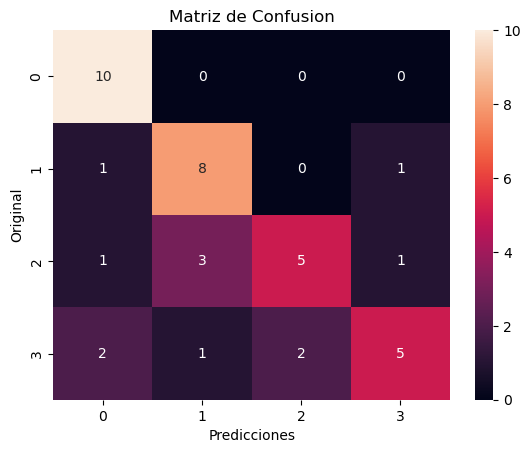

In [72]:
# By: Bastián Astudillo Fica
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel("Predicciones")
ax.set_ylabel("Original")
ax.set_title("Matriz de Confusion")

* Clase 0: 10 verdaderas positivos
* Clase 1: 8 verdaderos positivos y 2 negativos
* Clase 2: 5 Verdaderos positivos y 5 negativos
* Clase 3: 5 verdaderos positivos y 5 negativos